# Building the Multi-Task Model

### Reading in the X and Y semi-raw data

In [1]:
import numpy as np

In [2]:
X = np.load('data/x_data.npy')

In [3]:
Y = np.load('data/y_data.npy')

# Refactoring and Fine Filtering Data

In [143]:
tasks = {}

for x,y in zip(X,Y):
    if y in tasks:
        tasks[y]['data'].append(np.array(x[2:]))
        tasks[y]['target'].append(x[0])
    else:
        tasks[y] = {}
        tasks[y]['data'] = [np.array(x[2:])]
        tasks[y]['target'] = [x[0]]


In [145]:
print(tasks['CHEMBL2114881']['target'])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [163]:
index = 1
top_targets = {}
for key, value in sorted(tasks.items(), key=lambda item: len(item[1]['target']), reverse=True):
    top_targets[key] = {}
    top_targets[key]['data'] = np.array(value['data'])
    top_targets[key]['target'] = np.array(value['target'])

    if index == 100:
        break
    index +=1 

### These are the top 100 targets that will be trained

In [164]:
print(list(top_targets))

['CHEMBL2114881', 'CHEMBL2114714', 'CHEMBL1963941', 'CHEMBL1963883', 'CHEMBL3562022', 'CHEMBL1614063', 'CHEMBL1738498', 'CHEMBL3881499', 'CHEMBL1614432', 'CHEMBL1613885', 'CHEMBL4028923', 'CHEMBL2218781', 'CHEMBL3880337', 'CHEMBL3880339', 'CHEMBL3880338', 'CHEMBL4028921', 'CHEMBL4028924', 'CHEMBL3705123', 'CHEMBL1613799', 'CHEMBL4028922', 'CHEMBL1738424', 'CHEMBL3880340', 'CHEMBL1738407', 'CHEMBL4017550', 'CHEMBL3706327', 'CHEMBL3880341', 'CHEMBL3436039', 'CHEMBL3436040', 'CHEMBL1614547', 'CHEMBL3436041', 'CHEMBL3431934', 'CHEMBL3880334', 'CHEMBL3880335', 'CHEMBL1614423', 'CHEMBL3880344', 'CHEMBL1964096', 'CHEMBL3431931', 'CHEMBL1964000', 'CHEMBL1614199', 'CHEMBL2114818', 'CHEMBL2114719', 'CHEMBL3880342', 'CHEMBL1963965', 'CHEMBL1119333', 'CHEMBL1614549', 'CHEMBL3734174', 'CHEMBL3887033', 'CHEMBL1614359', 'CHEMBL1006579', 'CHEMBL3707950', 'CHEMBL2114737', 'CHEMBL3882758', 'CHEMBL3215171', 'CHEMBL3883019', 'CHEMBL3882757', 'CHEMBL2114791', 'CHEMBL3214986', 'CHEMBL3707758', 'CHEMBL211474

In [165]:
print(top_targets['CHEMBL2114881']['data'])

[[1.0 0.0 0.0 ... 1.0 0.0 1.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]]


In [167]:
from keras.layers import Input, Dense
from keras.models import Model
import time

inputs = Input(shape=(512,))
shared_mlp = Dense(64, activation='relu')(inputs)
shared_mlp = Dense(64, activation='relu')(shared_mlp)

# make a dictionary of models for each task
models_mtl = dict()
print('Creating Sub Models:')
og_start = time.time()
index = 1
for x in top_targets.keys():
    start = time.time()
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1)(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='sgd', loss='mean_squared_error')
    models_mtl[x] = model
    end = time.time()
    
    print("Model: ", index, " | Section Time: ", end - start, " | Elapsed Time: ", end - og_start)
    index += 1

Creating Sub Models:
Model:  1  | Section Time:  0.0384061336517334  | Elapsed Time:  0.0384061336517334
Model:  2  | Section Time:  0.04989123344421387  | Elapsed Time:  0.08929610252380371
Model:  3  | Section Time:  0.062416791915893555  | Elapsed Time:  0.15171289443969727
Model:  4  | Section Time:  0.06698060035705566  | Elapsed Time:  0.21869349479675293
Model:  5  | Section Time:  0.06490254402160645  | Elapsed Time:  0.2835960388183594
Model:  6  | Section Time:  0.06194639205932617  | Elapsed Time:  0.34554243087768555
Model:  7  | Section Time:  0.062372446060180664  | Elapsed Time:  0.4079148769378662
Model:  8  | Section Time:  0.04922747611999512  | Elapsed Time:  0.45714235305786133
Model:  9  | Section Time:  0.053071022033691406  | Elapsed Time:  0.5112307071685791
Model:  10  | Section Time:  0.06298017501831055  | Elapsed Time:  0.5762863159179688
Model:  11  | Section Time:  0.06413722038269043  | Elapsed Time:  0.6404235363006592
Model:  12  | Section Time:  0.0510

Model:  98  | Section Time:  0.06615996360778809  | Elapsed Time:  6.925210475921631
Model:  99  | Section Time:  0.0662696361541748  | Elapsed Time:  6.991480112075806
Model:  100  | Section Time:  0.060849666595458984  | Elapsed Time:  7.052329778671265


## Creating the Train-Test Split

In [169]:
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()

#print(top_targets[x][0])

for x in top_targets.keys():
    X_train[x], X_test[x], y_train[x], y_test[x] = train_test_split(top_targets[x]['data'], 
                                                        top_targets[x]['target'], 
                                                        test_size=test_size, 
                                                        random_state=42)


In [170]:
%%time
EPOCHS = 20
from random import shuffle

all_keys = list(top_targets)
for i in range(EPOCHS):
    print('Epoch',i,end=', ')
    shuffle(all_keys)
    for x in all_keys:
        models_mtl[x].fit(X_train[x],y_train[x], verbose=0)

Epoch 0, Epoch 1, Epoch 2, Epoch 3, Epoch 4, Epoch 5, Epoch 6, Epoch 7, Epoch 8, Epoch 9, Epoch 10, Epoch 11, Epoch 12, Epoch 13, Epoch 14, Epoch 15, Epoch 16, Epoch 17, Epoch 18, Epoch 19, Wall time: 6min 27s


# Evaluating the Train-Test Split Data

In [171]:
%%time
y_mtl=[]
yhat_mtl=[]

for x in X_test.keys():
    yhat_mlp = models_mtl[x].predict(X_test[x])

    y_mtl.append(y_test[x].ravel())
    yhat_mtl.append(yhat_mlp.ravel())

Wall time: 2min 42s


In [172]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn.metrics import precision_score, mean_squared_log_error

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.figure(figsize=(15,10))
    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.title("Bland Altman, MSE: "+str(mean_squared_error(data1,data2)))
    plt.xlabel('Mean Score', fontsize=8)
    plt.ylabel('Diff Score', fontsize=8)
    plt.show()

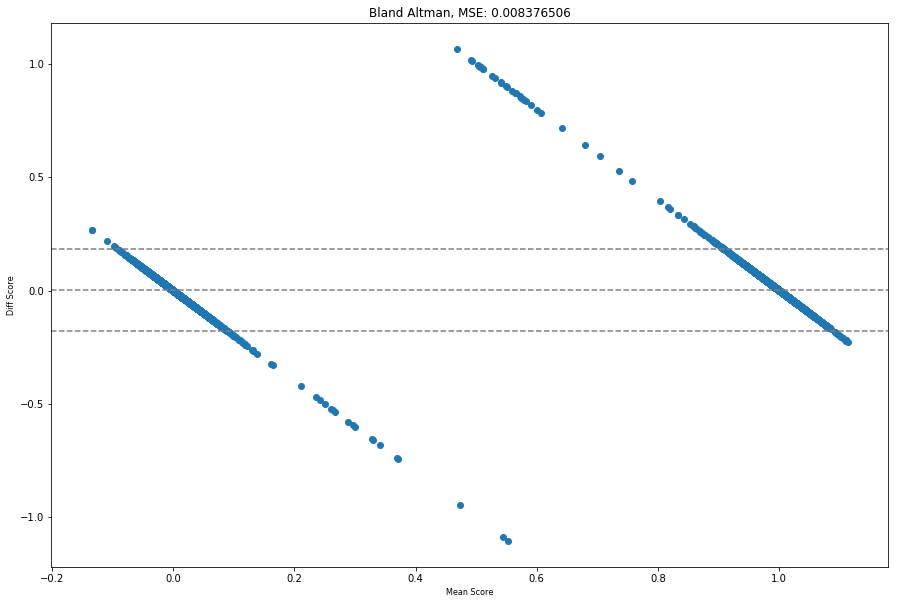

In [173]:

bland_altman_plot(np.concatenate(y_mtl), np.concatenate(yhat_mtl))